## Índice del Proyecto

1. [Descarga y Preparación de los Datos](#descarga-y-preparación-de-los-datos)
2. [Examinar Equilibrio de Clases y Entrenamiento del Modelo Base](#examinar-equilibrio-de-clases-y-entrenamiento-del-modelo-base)   
3. [Mejora de la Calidad del Modelo](#mejora-de-la-calidad-del-modelo)
4. [Entrenando Diversos Modelos](#entrenando-diversos-modelos)
5. [Conclusiones Generales](#prueba-final)

### Descripción del proyecto
Los clientes de Beta Bank se están yendo, cada mes, poco a poco. Los banqueros descubrieron que es más barato salvar a los clientes existentes que atraer nuevos.
Necesitamos predecir si un cliente dejará el banco pronto. Tú tienes los datos sobre el comportamiento pasado de los clientes y la terminación de contratos con el banco.
Crea un modelo con el máximo valor F1 posible. Para aprobar la revisión, necesitas un valor F1 de al menos 0.59. Verifica F1 para el conjunto de prueba. 
Además, debes medir la métrica AUC-ROC y compararla con el valor F1.




### Descripción de los datos

Características

    RowNumber: índice de cadena de datos
    CustomerId: identificador de cliente único
    Surname: apellido
    CreditScore: valor de crédito
    Geography: país de residencia
    Gender: sexo
    Age: edad
    Tenure: período durante el cual ha madurado el depósito a plazo fijo de un cliente (años)
    Balance: saldo de la cuenta
    NumOfProducts: número de productos bancarios utilizados por el cliente
    HasCrCard: el cliente tiene una tarjeta de crédito (1 - sí; 0 - no)
    IsActiveMember: actividad del cliente (1 - sí; 0 - no)
    EstimatedSalary: salario estimado

Objetivo

    Exited: El cliente se ha ido (1 - sí; 0 - no)

### Descarga y Preparación de los Datos

In [1]:
from sklearn.preprocessing import StandardScaler
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, roc_auc_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.pipeline import Pipeline

Se importan las librerias necesarias para desarrollar el proyecto

In [2]:
data = pd.read_csv('/datasets/Churn.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Se importa la informacion y se imprime los datos generales

In [3]:
data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [4]:
duplicados = data[data.duplicated()]
print('Numero de registros duplicados: ', duplicados.shape[0])

Numero de registros duplicados:  0


In [5]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Se imprimen algunos datos, posteriormente se revisa si existen duplicados y se imprime el comando describe para visualizar metricas generales de los datos.

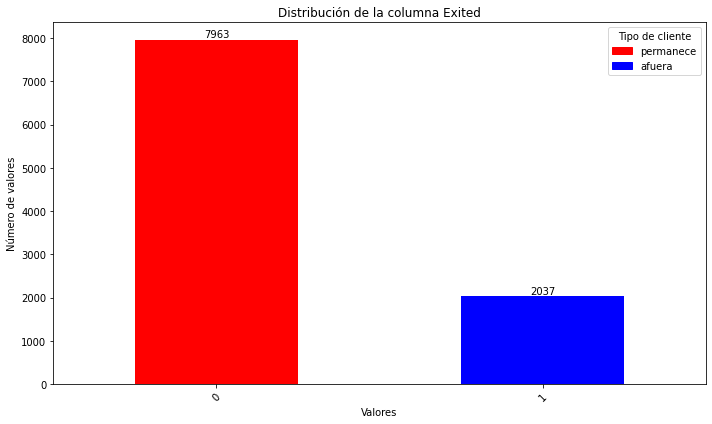

In [6]:
valoresobj = data['Exited'].value_counts()
colores = ['red', 'blue']
etiquetas = ['permanece', 'afuera']

ax = valoresobj.plot(kind='bar', figsize=(10, 6), color=colores)
plt.title('Distribución de la columna Exited')
plt.xlabel('Valores')
plt.ylabel('Número de valores')
plt.xticks(rotation=45)

for bar in ax.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, yval, ha='center', va='bottom')

handles = [plt.Rectangle((0, 0), 1, 1, color=colores[i]) for i in range(len(etiquetas))]
plt.legend(handles, etiquetas, title="Tipo de cliente")
plt.tight_layout()
plt.show()




Se clasifican y visualizan los datos correspondientes a la columna exited para corroborar el desequilibrio que podria existir en los datos otorgados.

In [7]:
data.isnull().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

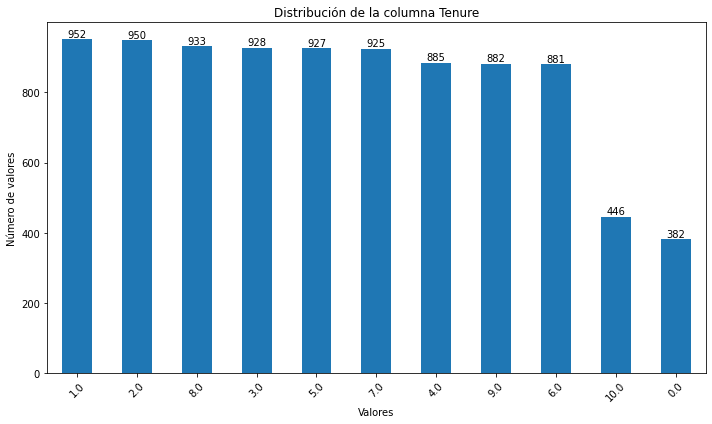

In [8]:
valoresobj = data['Tenure'].value_counts()
ax = valoresobj.plot(kind='bar', figsize=(10, 6))
plt.title('Distribución de la columna Tenure')
plt.xlabel('Valores')
plt.ylabel('Número de valores')
plt.xticks(rotation=45)
for bar in ax.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, yval, ha='center', va='bottom')
handles = [plt.Rectangle((0, 0), 1, 1, color=colores[i]) for i in range(len(etiquetas))]
plt.tight_layout()
plt.show()


In [9]:
data_median = data[data['Tenure'].notnull()]['Tenure'].mean()
data['Tenure'].fillna(data_median,inplace=True)
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

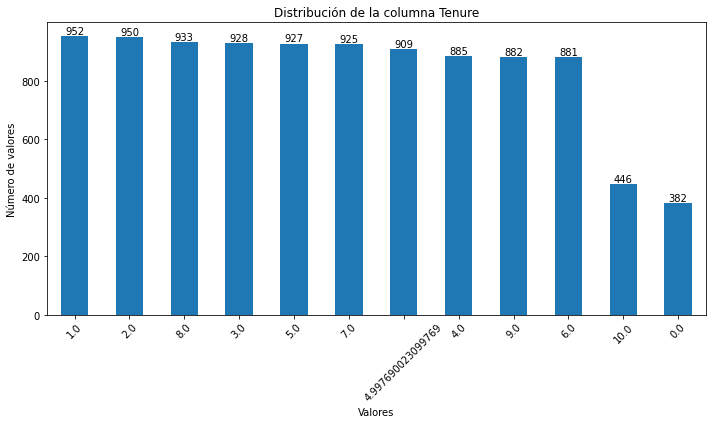

In [10]:
valoresobj = data['Tenure'].value_counts()
ax = valoresobj.plot(kind='bar', figsize=(10, 6))
plt.title('Distribución de la columna Tenure')
plt.xlabel('Valores')
plt.ylabel('Número de valores')
plt.xticks(rotation=45)
for bar in ax.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, yval, ha='center', va='bottom')
handles = [plt.Rectangle((0, 0), 1, 1, color=colores[i]) for i in range(len(etiquetas))]
plt.tight_layout()
plt.show()


Se reemplazan los datos nulos con la media de la columna Tenure visualizando que no afecta la distribucion en el proceso de correcion de nulos.

### Examinar Equilibrio de Clases y Entrenamiento del Modelo Base

In [11]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
data = pd.get_dummies(data,drop_first=True)
data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.00000,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.00000,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.00000,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.00000,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.00000,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5.00000,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10.00000,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7.00000,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3.00000,75075.31,2,1,0,92888.52,1,1,0,1


Se eliminan las columnas categoricas para convertirlas en variables dummy o indicadoras para preparar los datos para la posterior modelacion. 

In [12]:
features = data.drop(columns=['Exited'])
target= data['Exited']

Se divide el conjunto de datos en caracteristicas y objetivo, tomando en cuenta las columnas destinadas para el proposito,de este modo, la variable target se convierte en la dependiente y la propuesta a ser predecida.

In [13]:
features_train,features_temp, target_train, target_temp = train_test_split(features,target,test_size=0.3,random_state=123456789)
features_valid,features_test,target_valid,target_test = train_test_split(features_temp,target_temp,test_size=0.5,random_state=123456789)

print('Training set:', features_train.shape, target_train.shape)
print('Validation set:', features_valid.shape, target_valid.shape)
print('Test set:', features_test.shape, target_test.shape)


Training set: (7000, 11) (7000,)
Validation set: (1500, 11) (1500,)
Test set: (1500, 11) (1500,)


Se parte el conjunto de datos en tres partes: entrenamiento, validacion y prueba.

Resultados con el conjunto de validación:
               precision    recall  f1-score   support

           0       0.80      0.98      0.88      1181
           1       0.56      0.07      0.13       319

    accuracy                           0.79      1500
   macro avg       0.68      0.53      0.50      1500
weighted avg       0.75      0.79      0.72      1500

AUC-ROC: 0.69
F1 Score: 0.13


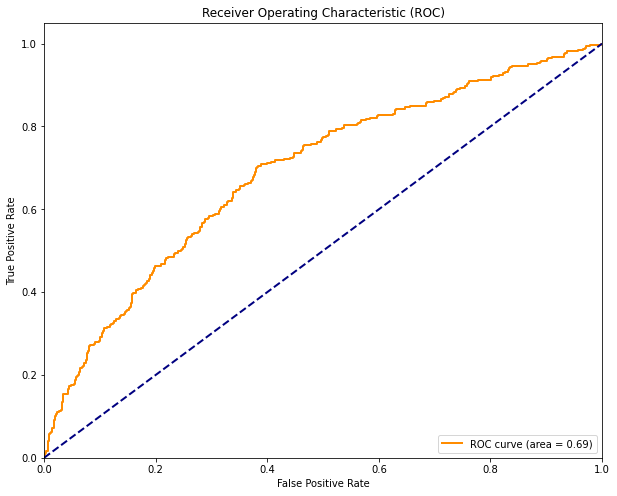

In [14]:

# Entrenar el modelo
model = LogisticRegression(max_iter=1000)
model.fit(features_train, target_train)

# Predicción de clases
predicted_valid_classes = model.predict(features_valid)
print('Resultados con el conjunto de validación:\n', classification_report(target_valid, predicted_valid_classes))

# Predicción de probabilidades para AUC-ROC
predicted_valid_proba = model.predict_proba(features_valid)[:, 1]
auc_roc = roc_auc_score(target_valid, predicted_valid_proba)
print(f'AUC-ROC: {auc_roc:.2f}')

# Cálculo del puntaje F1
f1 = f1_score(target_valid, predicted_valid_classes)
print(f'F1 Score: {f1:.2f}')

# Generación de la curva ROC
fpr, tpr, thresholds = roc_curve(target_valid, predicted_valid_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


Se entrena el primer modelo sin tratar los datos en desquilibrio, se calcula el AUC-Roc y el f1 Score de acuerdo al desempeño del modelo, visualizando un 0.08 en F1.

### Mejora de la Calidad del Modelo

##### Manejo de desequilibrio con Upsampler

Resultados con resampling manual:
               precision    recall  f1-score   support

           0       0.89      0.67      0.77      1181
           1       0.36      0.70      0.48       319

    accuracy                           0.68      1500
   macro avg       0.63      0.69      0.62      1500
weighted avg       0.78      0.68      0.70      1500

AUC-ROC: 0.72
F1 Score: 0.48


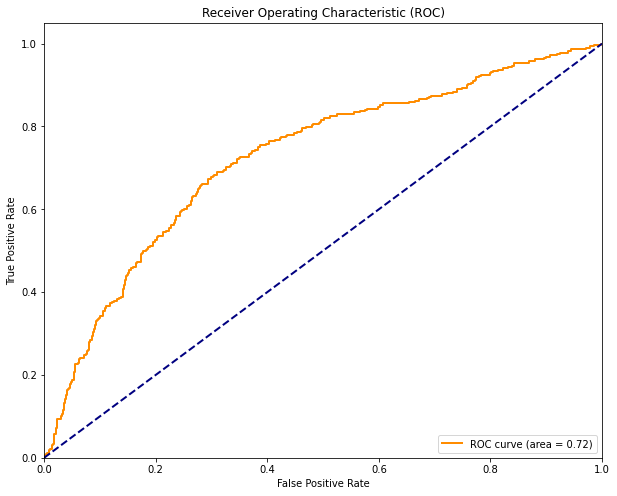

In [15]:
# Separate majority and minority classes
majority = features_train[target_train == 0]
minority = features_train[target_train == 1]

# Upsample minority class
minority_upsampled = resample(minority,
                              replace=True,      # Sample with replacement
                              n_samples=len(majority),   # To match majority class
                              random_state=12345)  # Reproducible results

# Combine majority class with upsampled minority class
upsampled_features = pd.concat([majority, minority_upsampled])
upsampled_target = pd.concat([target_train[target_train == 0], target_train[target_train == 1].sample(len(majority), replace=True, random_state=12345)])

# Downsample majority class
majority_downsampled = resample(majority,
                                replace=False,    # Sample without replacement
                                n_samples=len(minority),     # To match minority class
                                random_state=12345)  # Reproducible results

# Combine minority class with downsampled majority class
downsampled_features = pd.concat([majority_downsampled, minority])
downsampled_target = pd.concat([target_train[target_train == 0].sample(len(minority), replace=False, random_state=12345), target_train[target_train == 1]])

# You can choose to use either upsampled or downsampled data for training your model
# For this example, let's use the upsampled data
model = LogisticRegression(max_iter=1000)
model.fit(upsampled_features, upsampled_target)
predict = model.predict(features_valid)

# Print classification report
print('Resultados con resampling manual:\n', classification_report(target_valid, predict))

# Calculate the probabilities for the ROC curve
predicted_valid_proba = model.predict_proba(features_valid)[:, 1]

# Calculate AUC-ROC
auc_roc = roc_auc_score(target_valid, predicted_valid_proba)
print(f'AUC-ROC: {auc_roc:.2f}')

# Calculate F1 score
f1 = f1_score(target_valid, predict)
print(f'F1 Score: {f1:.2f}')

# Generate the ROC curve data
fpr, tpr, thresholds = roc_curve(target_valid, predicted_valid_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()




La técnica Upsampler aplicada al conjunto de datos ha mejorado la detección de la clase minoritaria a costa de una precisión reducida para esta clase, con un puntaje F1 de 0.48, lo que sugiere un balance entre precisión y recall aún mejorable. El AUC-ROC de 0.72 indica un rendimiento moderado. Los resultados sugieren que se deben explorar estrategias adicionales para mejorar el rendimiento del modelo, especialmente para la clase minoritaria.

#### Manejo de desequilibrio con under sampler

Resultados con Random Under Sampling:
               precision    recall  f1-score   support

           0       0.85      0.51      0.64      1181
           1       0.27      0.68      0.39       319

    accuracy                           0.55      1500
   macro avg       0.56      0.59      0.51      1500
weighted avg       0.73      0.55      0.59      1500

AUC-ROC: 0.62
F1 Score: 0.39


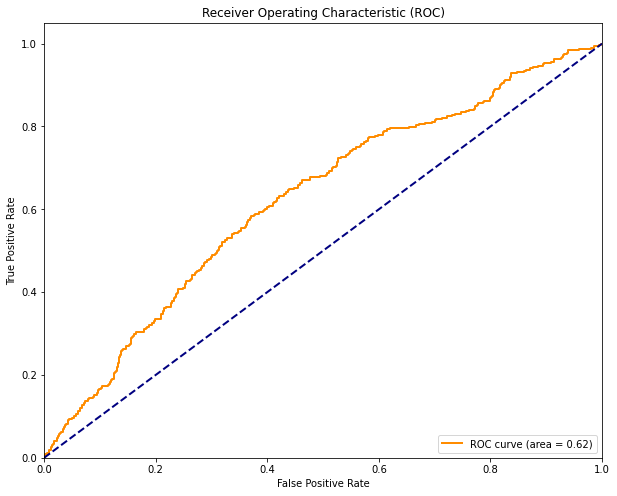

In [16]:
# Identify the majority and minority classes
majority_class = target_train.value_counts().idxmax()
minority_class = target_train.value_counts().idxmin()

# Separate the majority and minority classes in the training set
majority_class_indices = target_train[target_train == majority_class].index
minority_class_indices = target_train[target_train == minority_class].index

# Randomly sample from the majority class without replacement to match the size of the minority class
under_sample_indices = np.random.choice(majority_class_indices,
                                        size=len(minority_class_indices),
                                        replace=False)

# Combine the minority indices with the downsampled majority indices
under_sampled_indices = np.concatenate([minority_class_indices, under_sample_indices])


# Get the features and target for the under sampled data
features_rus_train = features_train.loc[under_sampled_indices]
target_rus_train = target_train.loc[under_sampled_indices]

# Create and train the logistic regression model
model_rus = LogisticRegression(max_iter=3000)
model_rus.fit(features_rus_train, target_rus_train)

# Make predictions on the validation set
predict_rus = model_rus.predict(features_valid)
print('Resultados con Random Under Sampling:\n', classification_report(target_valid, predict_rus))

# Calculate the probabilities for the ROC curve
predicted_valid_proba = model_rus.predict_proba(features_valid)[:, 1]

# Calculate AUC-ROC
auc_roc = roc_auc_score(target_valid, predicted_valid_proba)
print(f'AUC-ROC: {auc_roc:.2f}')

# Calculate F1 score
f1 = f1_score(target_valid, predict_rus)
print(f'F1 Score: {f1:.2f}')

# Generate the ROC curve data
fpr, tpr, thresholds = roc_curve(target_valid, predicted_valid_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Draws the random classification line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

El uso de RandomUnderSAmpler para el manejo de desquilibrio tiene un rendimiento aceptable pero muy parecido al Smote de esta forma se observa la similitud de valores en el puntaje F1, concluyendo que es mejor cambiar del tipo de modelo para aumentar las probabilidades de ajustar adecuadamente el f1Score.

In [20]:
target_rus_train.value_counts()

0    1402
1    1402
Name: Exited, dtype: int64

### Entrenando Diversos Modelos

#### RandomForestClassifier Model 

Resultados con Random Forest Classifier:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1181
           1       0.82      0.47      0.60       319

    accuracy                           0.87      1500
   macro avg       0.85      0.72      0.76      1500
weighted avg       0.86      0.87      0.85      1500

AUC-ROC con Random Forest Classifier: 0.86
F1 Score: 0.60


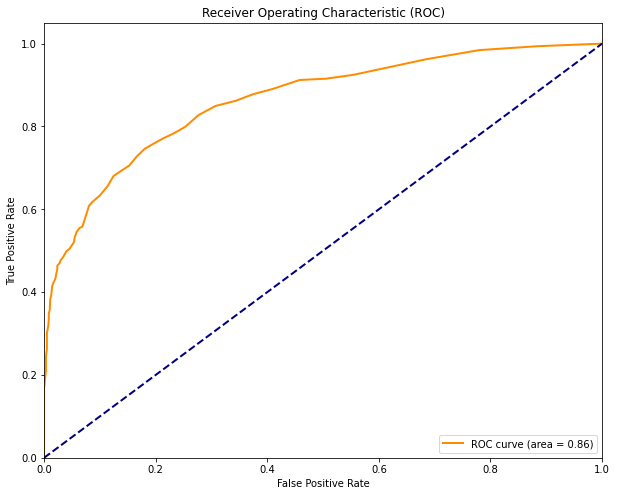

In [17]:
model_rf = RandomForestClassifier(random_state=123456789,max_depth=100,n_estimators=70)
model_rf.fit(features_train,target_train)
predicted_rf = model_rf.predict(features_valid)
print('Resultados con Random Forest Classifier:\n',classification_report(target_valid,predicted_rf))
predicted_valid_proba_rf = model_rf.predict_proba(features_valid)[:,1]
auc_roc_rf = roc_auc_score(target_valid,predicted_valid_proba_rf)
print(f'AUC-ROC con Random Forest Classifier: {auc_roc_rf:.2f}')
# Cálculo del puntaje F1
f1 = f1_score(target_valid, predicted_rf)
print(f'F1 Score: {f1:.2f}')
fpr, tpr,thresholds = roc_curve(target_valid,predicted_valid_proba_rf)
roc_auc = auc(fpr,tpr)
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Dibuja la línea de clasificación aleatoria
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

Se optó por utilizar el modelo RandomForestClassifier, entrenando el modelo con datos no tratados, los hiperparametros se han elegido por estimación, tanto el calculo del AUC-ROC es del 0.86 con un F1Score de 0.60 lo cual es una buena medida para predecir los datos y alcanzar los parametros suficientes del proyecto, sin embargo, puede mejorar.

#### RandomForestClassifier Model con manejo de desequilibrio under sampler

Resultados con Random Forest Classifier and Smote :
               precision    recall  f1-score   support

           0       0.88      0.95      0.91      1181
           1       0.74      0.53      0.62       319

    accuracy                           0.86      1500
   macro avg       0.81      0.74      0.77      1500
weighted avg       0.85      0.86      0.85      1500

AUC-ROC con Random Forest Classifier and Undersampler : 0.87
F1 Score: 0.62


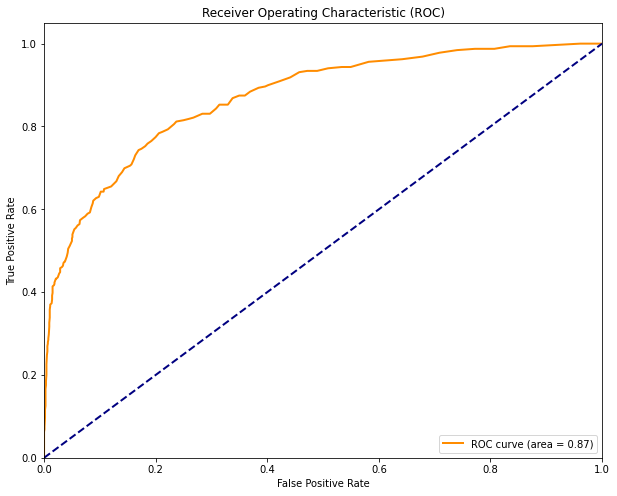

In [18]:

model_rf_smote = RandomForestClassifier(random_state=123456789,max_depth=150,n_estimators=150)
model_rf_smote.fit(upsampled_features, upsampled_target)
predicted_rf = model_rf_smote.predict(features_valid)
print('Resultados con Random Forest Classifier and Smote :\n',classification_report(target_valid,predicted_rf))
predicted_valid_proba_rf_smote = model_rf_smote.predict_proba(features_valid)[:,1]
auc_roc_rf_smote = roc_auc_score(target_valid,predicted_valid_proba_rf_smote)
print(f'AUC-ROC con Random Forest Classifier and Undersampler : {auc_roc_rf_smote:.2f}')
# Cálculo del puntaje F1
f1 = f1_score(target_valid, predicted_rf)
print(f'F1 Score: {f1:.2f}')
fpr, tpr,thresholds = roc_curve(target_valid,predicted_valid_proba_rf_smote)
roc_auc = auc(fpr,tpr)
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Dibuja la línea de clasificación aleatoria
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

En el segundo modelo Random Forest Classifier se entrena con informacion manejando el desequilibrio por medio de Under sampler dando un AUC-ROC de 0.87 con un F1-Score de 0.62, siendo un buen puntaje para predeciry superar los parametros propuestos para el proyecto en cuanto a la visuallización de la ROC muestra una tendencia positiva lo cual se puede interpretar como interpretación de forma adecuada.

### Conclusiones Generales

El proyecto se enfoca en prevenir la fuga de los clientes , lo que resulta se más económico que adquirir nuevos. utilizando los datos del comportamiento de los clientes, de esta forma se ha determinado que utilizar el modelo RandomForest es una buena opción para identificar con anticipación aquellos clientes que tienen la probabilidad de abandonar el banco.

De esta manera, el enfoque del proyecto ha sido optimizar el valor de F1, que es una métrica balanceada entre la precisión y la sensibilidad, crucial para minimizar los falsos positivos(clientes que se identifican erróneamente como propensos a irse) como los falsos negativos (clientes que se van pero el modelo no identifica).

Los resultados del modelo tomando en cuenta el RandomForest con entrenamiento sin procesamiento de desequilibrio muestra un valor f1 de 0.62 en comparacion con el modelo de Lineal Regression que desmuestra ser deficiente con un f1 de 0.42.

La métrica AUC-ROC de dicho modelo que ha demostrado ser el mejor es de 0.87.Que sirve precisamente para tener una estimacion de equilibrio en la clasificacion de las clases.

En el modelo se implemento el GridSearchCV y se entrenó el modelo con un conjunto de datos balanceado a través de la técnica Random Under Sampling. Se ha logrado una buena precisión para la clase maypritaria(clientes que se quedan), pero la precisión para la clase minoritaria(clientes que se van) es baja.

En general, el modelo es un punto de partida para identificar clientes en riesgo de abandonar el banco, pero podría optimizarse para mejorar el rendimiento.